# **Figures for UMB (Enhancing Newborn Health Assessment: Ultrasound-based Body Composition Prediction Using Deep Learning Techniques)**

The code below correspond to Figures 6 and 7 in the paper

## Figure 6: Fat-Mass Statistics for the combined Region of Bicep, Abdomen and Quadriceps


### FM (BAQ)

Patient C: Residual = 0.001363113522529602
Patient A: Residual = 0.013354167342185974
Patient G: Residual = 0.019640743732452393
Patient D: Residual = 0.02618429809808731
Patient B: Residual = 0.06927564942836761
Patient F: Residual = 0.08087782561779022
Patient E: Residual = 0.08133149147033691


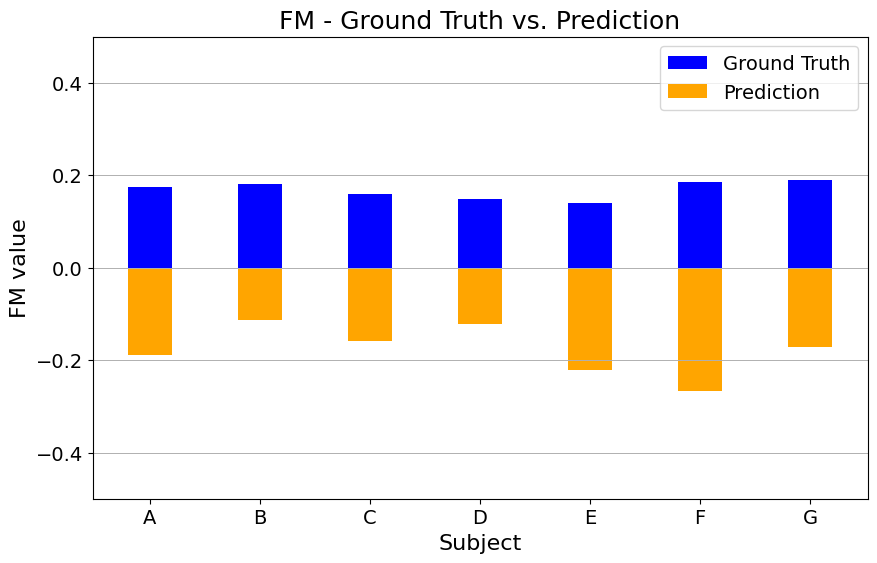

<Figure size 2560x1920 with 0 Axes>

,0,1,2,3,4,5,6
0,0.183035,0.207614,0.123253,0.156582,0.198316,0.146171,0.207961


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# BAQ Ground Truth and Prediction Values
#GT_FM = [0.5468620657920837, 0.5280953645706177, 0.5396167635917664, 0.5303874611854553, 0.5550014972686768, 0.5663071274757385, 0.5427206158638]

#Pred_FM = [0.5397107601165771, 0.5400791764259338, 0.5425641536712646, 0.5546051263809204, 0.5285475850105286, 0.5157825350761414, 0.5514687299728394]


# Patients identifiers
patients = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Compute residuals
residuals = [abs(gt - pred) for gt, pred in zip(GT_FM, Pred_FM)]

# Combine patients with their residuals and sort
sorted_residuals = sorted(zip(patients, residuals), key=lambda x: x[1])

# Print sorted residuals
for patient, residual in sorted_residuals:
    print(f"Patient {patient}: Residual = {residual}")

# Creating the bar chart
plt.figure(figsize=(10, 6))

# Define the position for the bars
x = np.arange(len(GT_FM))

# Plotting the Ground Truth as bars above the line
plt.bar(x, GT_FM, width=0.4, label='Ground Truth', color='blue', align='center')

# Plotting the Predicted values as bars below the line (negative values)
plt.bar(x, [-val for val in Pred_FM], width=0.4, label='Prediction', color='orange', align='center')

# Adjusting axis labels and title font size
plt.xlabel('Subject', fontsize=16)
plt.ylabel('FM value', fontsize=16)
plt.title('FM - Ground Truth vs. Prediction', fontsize=18)
plt.yticks(fontsize=14)
# Customizing x-axis tick labels to be A, B, C, etc.
plt.xticks(x, [chr(65 + i) for i in range(len(GT_FM))], fontsize=14)

# Adding a legend with larger font size
plt.legend(fontsize=14)

# Enlarging the y-axis scale slightly to bring the bars closer together visually
plt.ylim(-0.5, 0.5)

plt.grid(axis='y', linestyle='-', linewidth=0.7)
plt.figure(dpi=400)
plt.show()
import io
import pandas as pd
pd.read_csv(io.StringIO('''
0.1830354929,0.2076143324,0.1232530028,0.1565817595,0.198316291,0.146171391,0.2079612166
'''), header=None)


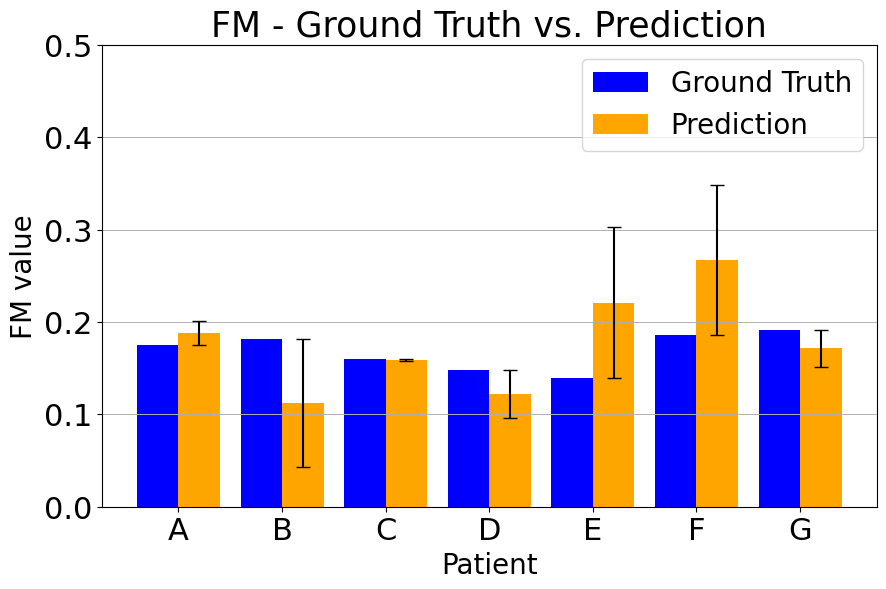

In [ ]:
## MODEL PREDICTION vs GROUND TRUTH bar chart
import matplotlib.pyplot as plt
import numpy as np

# Example data
#GT_FM = [0.5468620657920837, 0.5280953645706177, 0.5396167635917664, 0.5303874611854553, 0.5550014972686768, 0.5663071274757385, 0.5427206158638]

#Pred_FM = [0.5397107601165771, 0.5400791764259338, 0.5425641536712646, 0.5546051263809204, 0.5285475850105286, 0.5157825350761414, 0.5514687299728394]

# Creating the bar chart
plt.figure(figsize=(10, 6))
# Define the position for the bars
x = np.arange(len(GT_FM))

# Plotting the Ground Truth as bars above the line
bars1 = plt.bar(x - 0.2, GT_FM, width=0.4, label='Ground Truth', color='blue', align='center')

# Sample error data #USE ERROR from cell ABOVE
#y_error = np.random.rand(len(Pred_FM)) * 0.05

# Plotting the Predicted values as bars, but taking their absolute values for symmetry
bars2 = plt.bar(x + 0.2, Pred_FM, width=0.4, yerr=error, label='Prediction', color='orange', align='center', capsize=5)

# Add value labels to the bars
'''for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='baseline', ha='left', fontsize=10)'''

# Adjusting axis labels and title font size
plt.xlabel('Patient', fontsize=20)
plt.ylabel('FM value', fontsize=20)
plt.title('FM - Ground Truth vs. Prediction', fontsize=25)

# Customizing x-axis tick labels to be A, B, C, etc.
plt.xticks(x, [chr(65 + i) for i in range(len(GT_FM))], fontsize=22)

plt.yticks(fontsize=22)

# Adding a legend with larger font size
plt.legend(fontsize=20)
# Enlarging the y-axis scale slightly to bring the bars closer together visually
plt.ylim(0,0.5)
plt.grid(axis='y', linestyle='-', linewidth=0.7)
plt.savefig('fm_gt_pred.png', dpi=500, bbox_inches='tight')
plt.show()

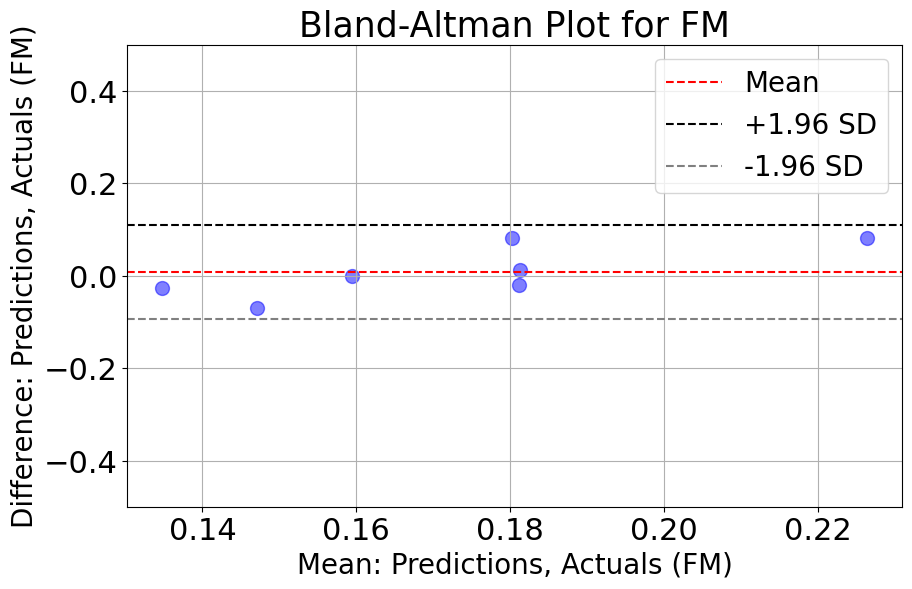

In [ ]:
## Band - Altman Plot
import numpy as np
import matplotlib.pyplot as plt

def bland_altman_plot(actuals, predictions, y_min=None, y_max=None):
    differences = predictions - actuals  # Calculate the differences
    means = (predictions + actuals) / 2  # Calculate the means

    mean_difference = np.mean(differences)
    sd_difference = np.std(differences)

    plt.figure(figsize=(10, 6))
    plt.scatter(means, differences, s=100, alpha=0.5, color='blue')
    plt.axhline(mean_difference, color='red', linestyle='--', label='Mean')
    plt.axhline(mean_difference + 1.96 * sd_difference, color='black', linestyle='--', label='+1.96 SD')
    plt.axhline(mean_difference - 1.96 * sd_difference, color='gray', linestyle='--', label='-1.96 SD')

    plt.title('Bland-Altman Plot for FM', fontsize=25)
    plt.xlabel('Mean: Predictions, Actuals (FM)', fontsize=20)
    plt.ylabel('Difference: Predictions, Actuals (FM)', fontsize=20)

    # Set font size for x and y axis tick labels
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    # Adjust the y-axis scale if provided
    plt.ylim(-0.5,0.5)
    plt.legend(fontsize=20, loc='upper right')  # You can adjust the location as needed

    plt.grid(True)
    plt.savefig('fm_bap.png', dpi=500, bbox_inches='tight')
    plt.show()
bland_altman_plot(actuals, predictions, y_min=-10, y_max=10)  # Set y_min and y_max as needed


0.010765725743525523


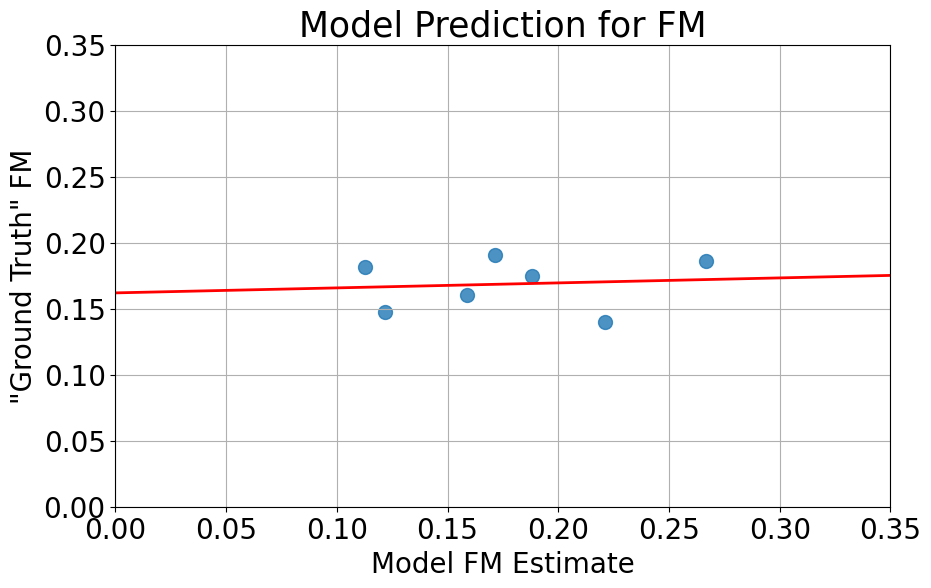

In [ ]:
## Model Prediction Plot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Example data
ground_truth = GT_FM
prediction = Pred_FM

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(prediction, ground_truth, s=100, alpha=0.8)

# Calculate the line of best fit (linear regression)
slope, intercept = np.polyfit(prediction, ground_truth, 1)

# Define a range for x values (for the line of best fit)
x_fit = np.linspace(0, 4, 100)
y_fit = slope * x_fit + intercept

# Plot the line of best fit
plt.plot(x_fit, y_fit, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Model FM Estimate', fontsize=20)
plt.ylabel('"Ground Truth" FM', fontsize=20)
plt.title('Model Prediction for FM', fontsize=25)
plt.grid(True)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Set axis limits
plt.ylim(0.0, 0.35)
plt.xlim(0.0, 0.35)

r2 = r2_score(ground_truth, np.polyval([slope, intercept], prediction))
print(r2)
plt.savefig('fm_mod_pred.png', dpi=500, bbox_inches='tight')
# Show plot
plt.show()


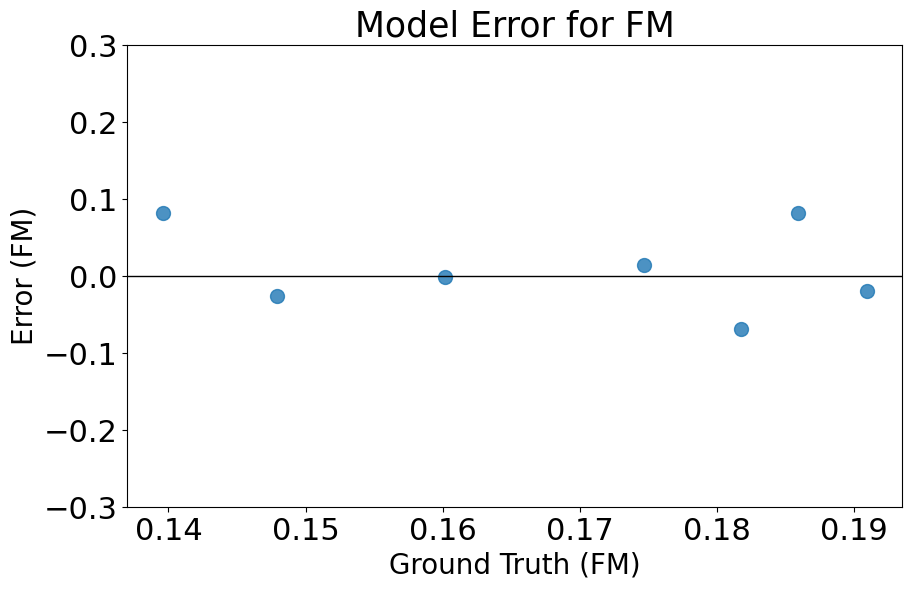

In [ ]:
## Model Error Plot
ground_truth = GT_FM
prediction = Pred_FM

# Calculate error
error = difference = [a - b for a, b in zip(prediction, ground_truth)]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ground_truth, error, s=100, alpha=0.8)
plt.axhline(y=0, color='black', linewidth=1)

# Add labels and title

plt.xlabel('Ground Truth (FM)', fontsize=20)
plt.ylabel('Error (FM)', fontsize=20)
plt.title('Model Error for FM', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylim(-0.3,0.3)
# Show plot
plt.savefig('fm_mod_err.png', dpi=500, bbox_inches='tight')
plt.show()

### FFM (BAQ)

Patient B: Residual = 0.025050640106201172
Patient E: Residual = 0.05020427703857422
Patient G: Residual = 0.08461761474609375
Patient F: Residual = 0.10598278045654297
Patient A: Residual = 0.26762163639068604
Patient D: Residual = 0.30445027351379395
Patient C: Residual = 0.7716233730316162


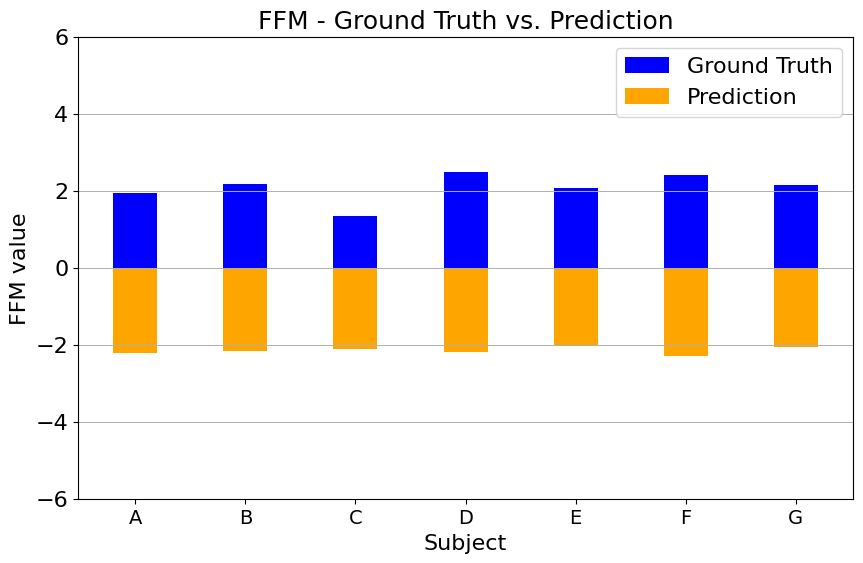

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# FFM Prediction for combined body part region
#GT_FFM =[0.8743740916252136, 0.8982381224632263, 0.7909894585609436, 0.923119068145752, 0.8892694115638733, 0.9165064692497253, 0.895603358745575]

#Pred_FFM = [0.8042798042297363, 0.7631562948226929, 0.9103229641914368, 0.8111854791641235, 0.8526937961578369, 0.8047778010368347, 0.812553882598877]



# Patients identifiers
patients = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Compute residuals
residuals = [abs(gt - pred) for gt, pred in zip(GT_FFM, Pred_FFM)]

# Combine patients with their residuals and sort
sorted_residuals = sorted(zip(patients, residuals), key=lambda x: x[1])

# Print sorted residuals
for patient, residual in sorted_residuals:
    print(f"Patient {patient}: Residual = {residual}")

# Creating the bar chart
plt.figure(figsize=(10, 6))

# Define the position for the bars
x = np.arange(len(GT_FFM))

# Plotting the Ground Truth as bars above the line
plt.bar(x, GT_FFM, width=0.4, label='Ground Truth', color='blue', align='center')

# Plotting the Predicted values as bars below the line (negative values)
plt.bar(x, [-val for val in Pred_FFM], width=0.4, label='Prediction', color='orange', align='center')

# Adjusting axis labels and title font size
plt.xlabel('Subject', fontsize=16)
plt.ylabel('FFM value', fontsize=16)
plt.title('FFM - Ground Truth vs. Prediction', fontsize=18)

# Customizing x-axis tick labels to be A, B, C, etc.
plt.xticks(x, [chr(65 + i) for i in range(len(GT_FFM))], fontsize=14)

plt.yticks(fontsize=16)
# Adding a legend with larger font size
plt.legend(fontsize=16)

# Enlarging the y-axis scale slightly to bring the bars closer together visually
plt.ylim(-6, 6)

plt.grid(axis='y', linestyle='-', linewidth=0.7)
plt.show()


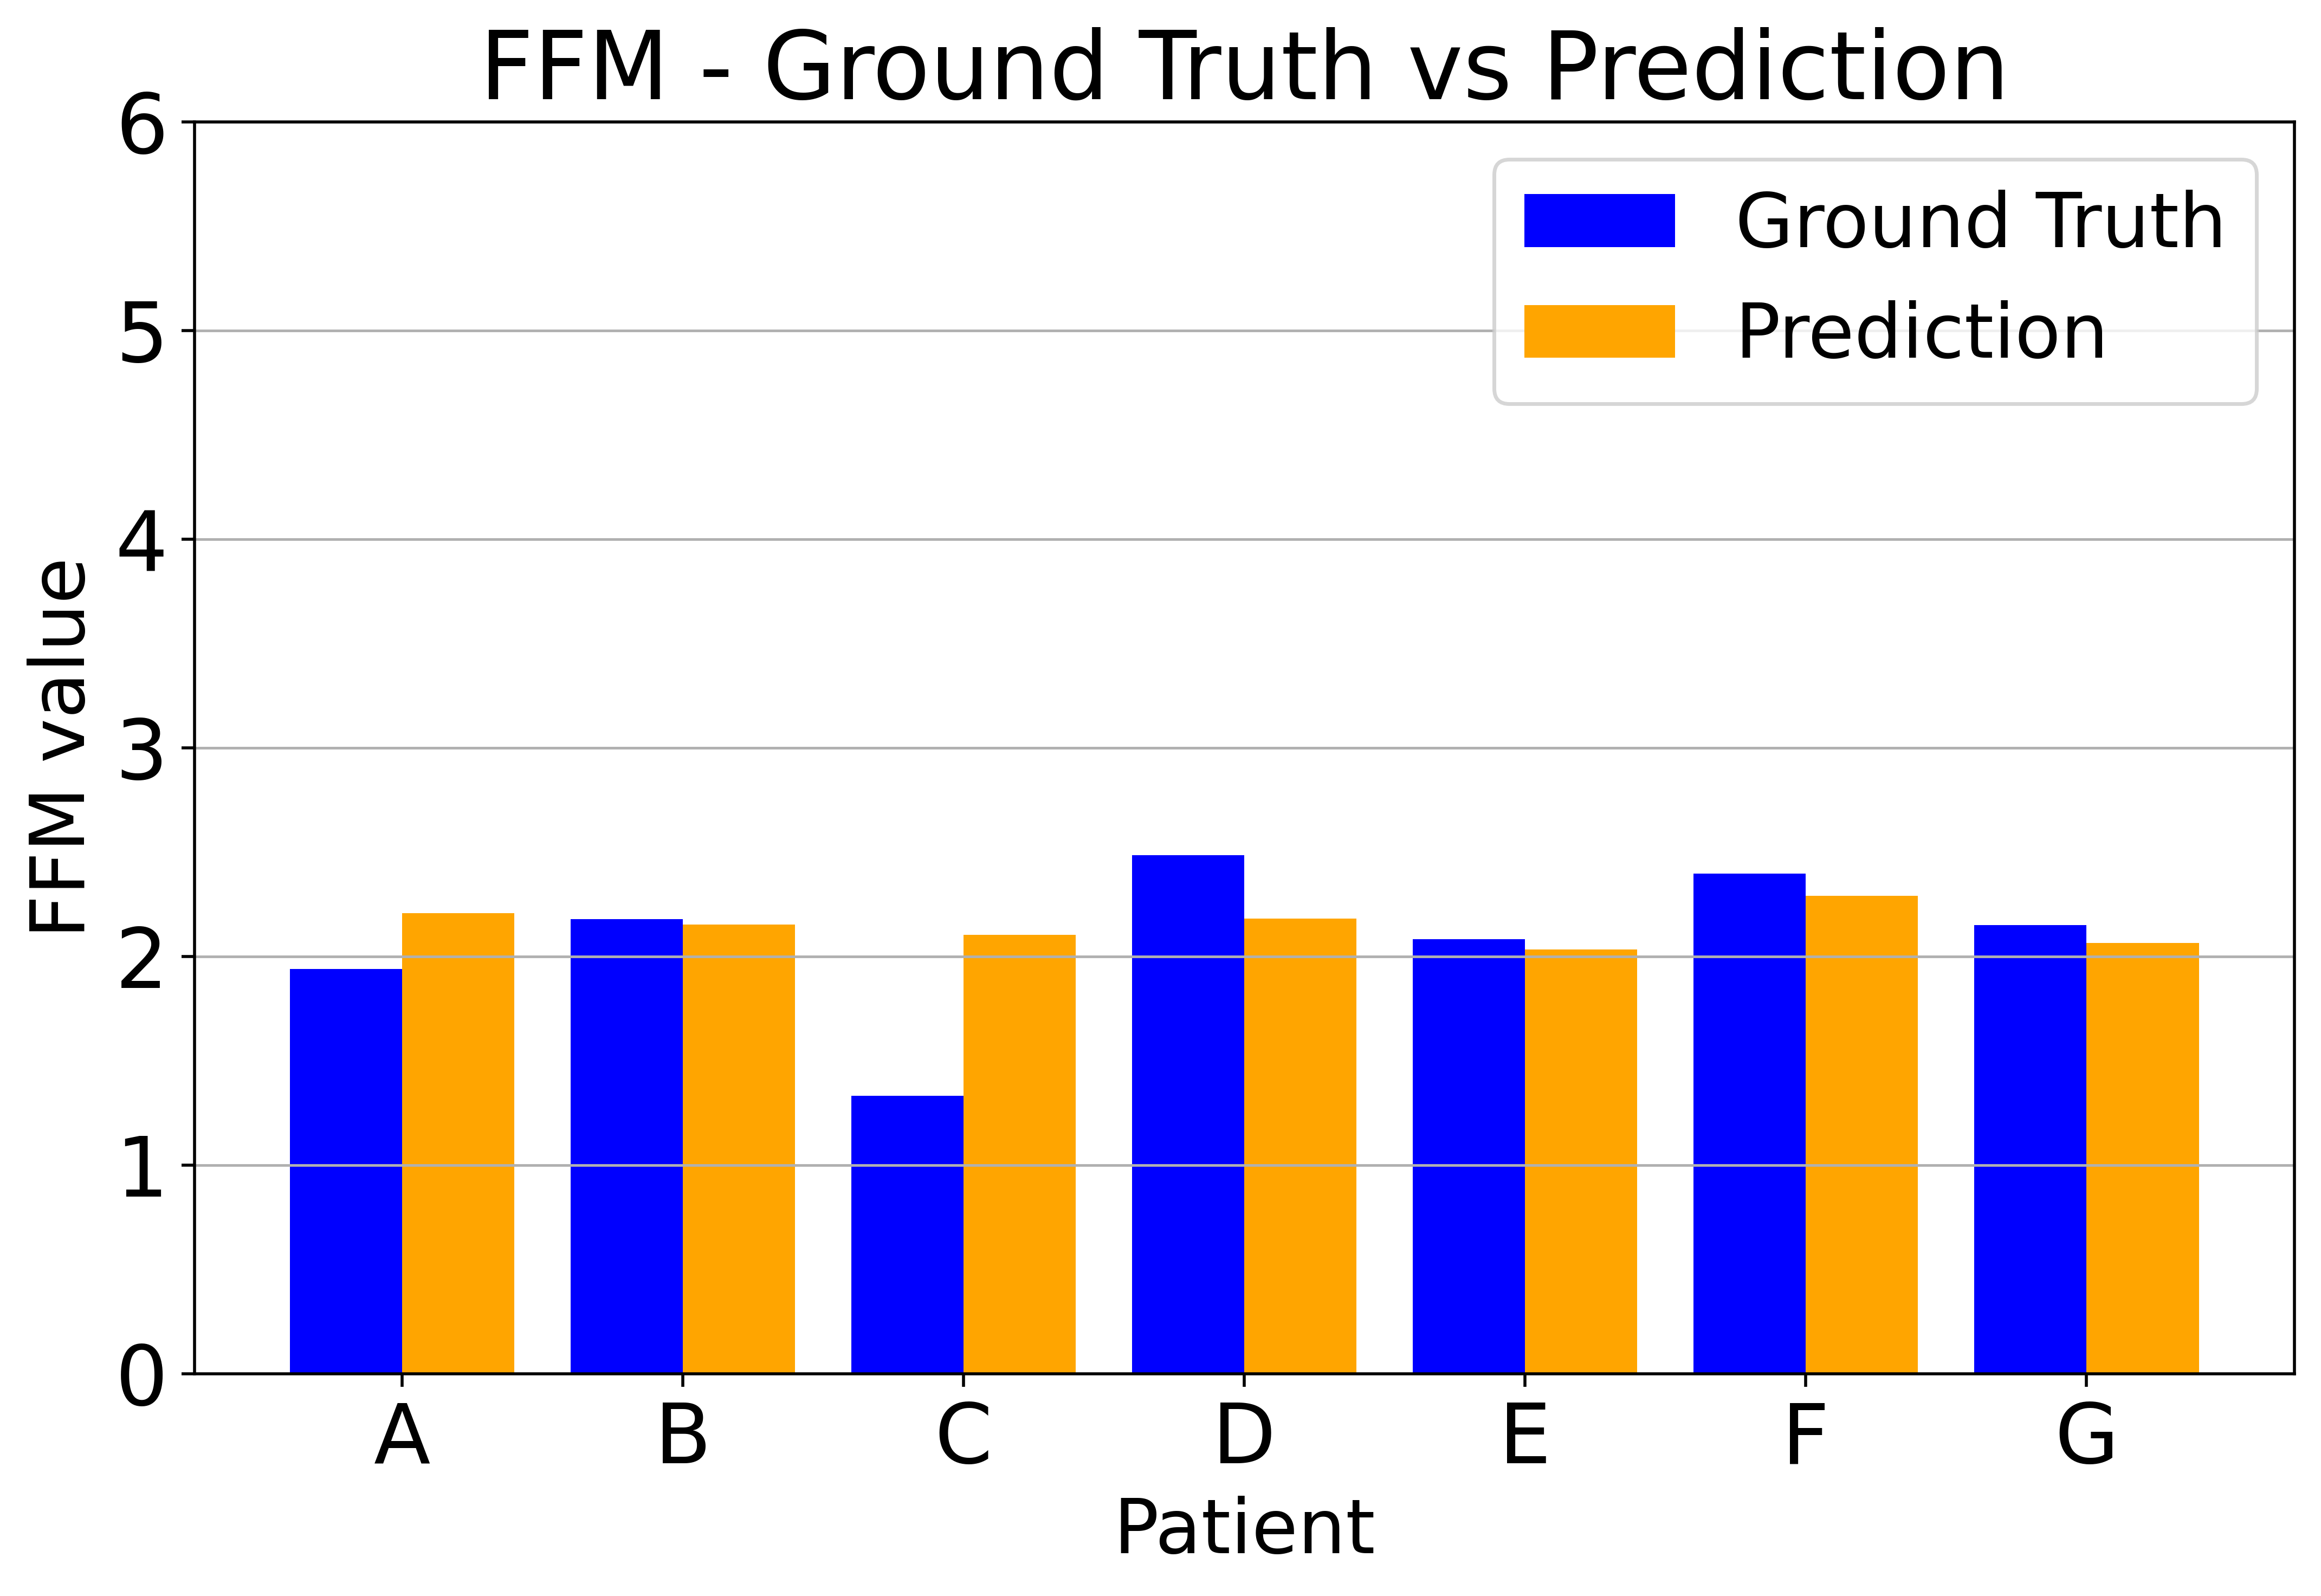

In [ ]:
## MODEL PREDICTION vs GROUND TRUTH bar chart
import matplotlib.pyplot as plt
import numpy as np

# Example data
GT_FFM = GT_FFM
Pred_FFM = Pred_FFM

# Creating the bar chart
plt.figure(figsize=(10, 6), dpi=500)

# Define the position for the bars
x = np.arange(len(GT_FFM))

# Plotting the Ground Truth as bars above the line
plt.bar(x - 0.2, GT_FFM, width=0.4, label='Ground Truth', color='blue', align='center')

# Plotting the Predicted values as bars, but taking their absolute values for symmetry
plt.bar(x + 0.2, Pred_FFM, width=0.4, label='Prediction', color='orange', align='center')

# Adjusting axis labels and title font size
plt.xlabel('Patient', fontsize=20)
plt.ylabel('FFM value', fontsize=20)
plt.title('FFM - Ground Truth vs Prediction', fontsize=25)

# Customizing x-axis tick labels to be A, B, C, etc.
plt.xticks(x, [chr(65 + i) for i in range(len(GT_FFM))], fontsize=22)

plt.yticks(fontsize=22)

# Adding a legend with larger font size
plt.legend(fontsize=20)

# Enlarging the y-axis scale slightly to bring the bars closer together visually
plt.ylim(0, 6)
plt.savefig('ffm_gt_pred.png', dpi=500, bbox_inches='tight')

plt.grid(axis='y', linestyle='-', linewidth=0.7)
plt.show()


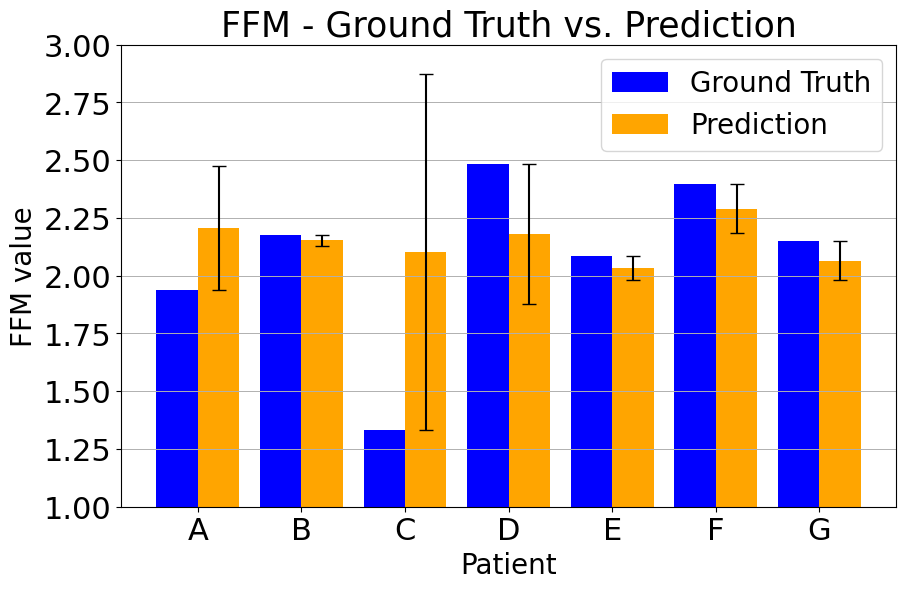

In [ ]:
# Ground Truth vs Prediction Plot with Error Bars
import matplotlib.pyplot as plt
import numpy as np

# Example data
GT_FFM = GT_FFM
Pred_FFM = Pred_FFM

# Creating the bar chart
plt.figure(figsize=(10, 6))
# Define the position for the bars
x = np.arange(len(GT_FFM))

# Plotting the Ground Truth as bars above the line
bars1 = plt.bar(x - 0.2, GT_FFM, width=0.4, label='Ground Truth', color='blue', align='center')

# Sample error data #USE ERROR from cell ABOVE
#y_error = np.random.rand(len(Pred_FM)) * 0.05

# Plotting the Predicted values as bars, but taking their absolute values for symmetry
bars2 = plt.bar(x + 0.2, Pred_FFM, width=0.4, yerr=error, label='Prediction', color='orange', align='center', capsize=5)

# Add value labels to the bars
'''for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='center_baseline', ha='left', fontsize=10)'''

# Adjusting axis labels and title font size
plt.xlabel('Patient', fontsize=20)
plt.ylabel('FFM value', fontsize=20)
plt.title('FFM - Ground Truth vs. Prediction', fontsize=25)

# Customizing x-axis tick labels to be A, B, C, etc.
plt.xticks(x, [chr(65 + i) for i in range(len(GT_FM))], fontsize=22)

plt.yticks(fontsize=22)

# Adding a legend with larger font size
plt.legend(fontsize=20)
# Enlarging the y-axis scale slightly to bring the bars closer together visually
plt.ylim(1,3)
plt.grid(axis='y', linestyle='-', linewidth=0.7)
plt.savefig('ffm_gt_pred.png', dpi=500, bbox_inches='tight')
plt.show()

0.06699134622301374
Mean Difference (Bias): 0.06699134622301374
Lower Limit of Agreement: -0.5745006219365502
Upper Limit of Agreement: 0.7084833143825776


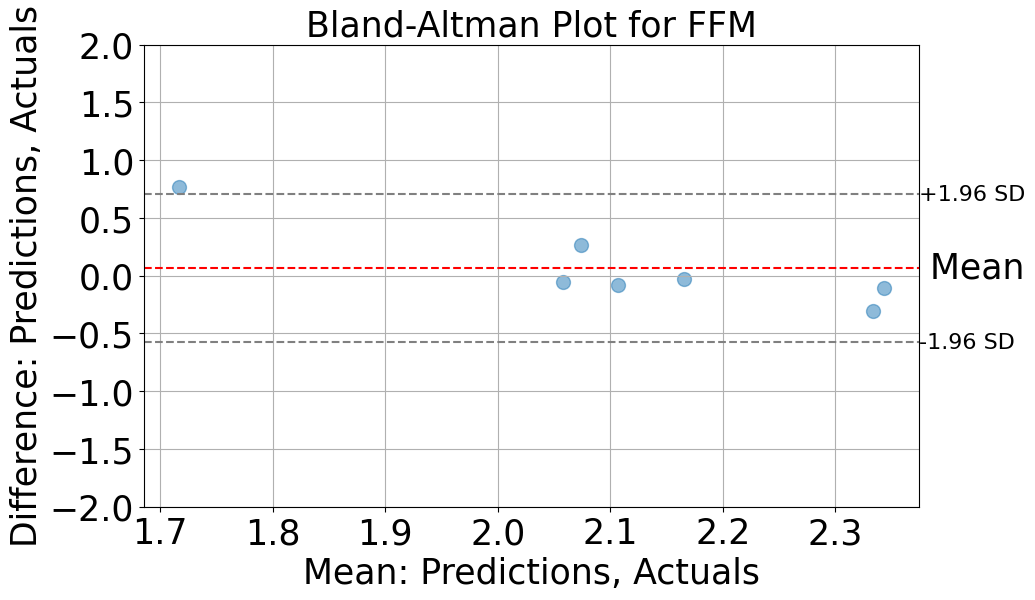

In [ ]:
## Bland - Altman Plot
def bland_altman_plot(actuals, predictions):
    differences = predictions - actuals  # Calculate the differences
    means = (predictions + actuals) / 2  # Calculate the means

    mean_difference = np.mean(differences)
    sd_difference = np.std(differences)
    print(mean_difference) # mean bias

    # Calculate limits of agreement
    lower_limit = mean_difference - 1.96 * sd_difference
    upper_limit = mean_difference + 1.96 * sd_difference

    # Print results
    print(f"Mean Difference (Bias): {mean_difference}")
    print(f"Lower Limit of Agreement: {lower_limit}")
    print(f"Upper Limit of Agreement: {upper_limit}")

    plt.figure(figsize=(10, 6))
    plt.scatter(means, differences, s=100, alpha=0.5)
    plt.axhline(mean_difference, color='red', linestyle='--')
    plt.axhline(mean_difference + 1.96 * sd_difference, color='gray', linestyle='--')
    plt.axhline(mean_difference - 1.96 * sd_difference, color='gray', linestyle='--')

    # Set the offset for the x-position of the labels
    x_offset = np.max(means) + (np.max(means) - np.min(means)) * 0.05  # 5% to the right of max mean

    plt.text(x_offset, mean_difference, ' Mean', horizontalalignment='left', fontsize=25, verticalalignment='center')
    plt.text(x_offset, mean_difference + 1.96 * sd_difference, '+1.96 SD', horizontalalignment='left', fontsize=16, verticalalignment='center')
    plt.text(x_offset, mean_difference - 1.96 * sd_difference, '-1.96 SD', horizontalalignment='left', fontsize=16, verticalalignment='center')

    plt.title('Bland-Altman Plot for FFM', fontsize=25)
    plt.xlabel('Mean: Predictions, Actuals', fontsize=25)
    plt.ylabel('Difference: Predictions, Actuals', fontsize=25)

    # Set font size for x and y axis tick labels
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

    plt.grid(True)
    plt.ylim(-2,2)
    plt.show()

actuals = np.array(GT_FFM)
predictions = np.array(Pred_FFM)
bland_altman_plot(actuals, predictions)

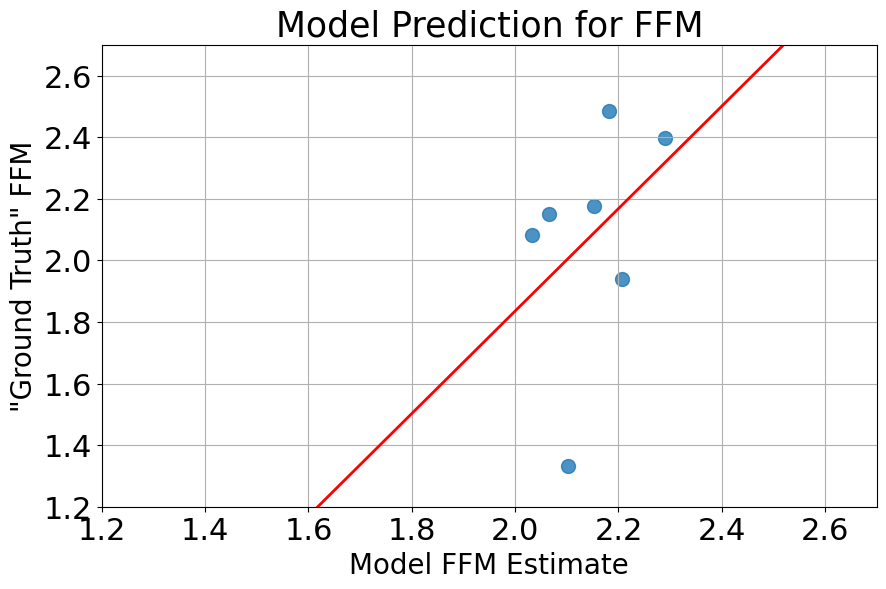

In [ ]:
# Model Prediction Plot
import matplotlib.pyplot as plt
import numpy as np

# Example data
ground_truth = GT_FFM
prediction = Pred_FFM

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(prediction, ground_truth, s=100, alpha=0.8)

# Calculate the line of best fit (linear regression)
slope, intercept = np.polyfit(prediction, ground_truth, 1)

# Define a range for x values (for the line of best fit)
x_fit = np.linspace(0, 4, 100)
y_fit = slope * x_fit + intercept

# Plot the line of best fit
plt.plot(x_fit, y_fit, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Model FFM Estimate', fontsize=20)
plt.ylabel('"Ground Truth" FFM', fontsize=20)
plt.title('Model Prediction for FFM', fontsize=25)
plt.grid(True)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Set axis limits
plt.ylim(1.2, 2.7)
plt.xlim(1.2, 2.7)
plt.savefig('ffm_mod_pred.png', dpi=500, bbox_inches='tight')

# Show plot
plt.show()


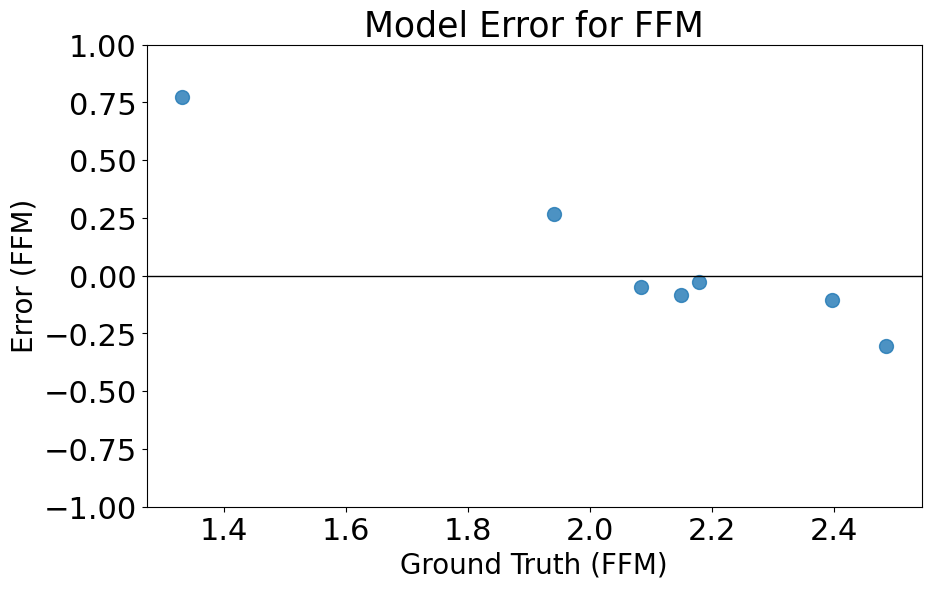

In [ ]:
# Model Error Plot
ground_truth = GT_FFM
prediction = Pred_FFM

# Calculate error
error = difference = [a - b for a, b in zip(prediction, ground_truth)]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ground_truth, error, s=100, alpha=0.8)
plt.axhline(y=0, color='black', linewidth=1)

# Add labels and title
plt.xlabel('Ground Truth (FFM)', fontsize=20)
plt.ylabel('Error (FFM)', fontsize=20)
plt.title('Model Error for FFM', fontsize=25)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.ylim(-1,1)
plt.savefig('ffm_mod_err.png', dpi=500, bbox_inches='tight')
# Show plot
plt.show()

##  Figure 7: Fat-Mass Statistics for the Bicep Region


### FFM (B)

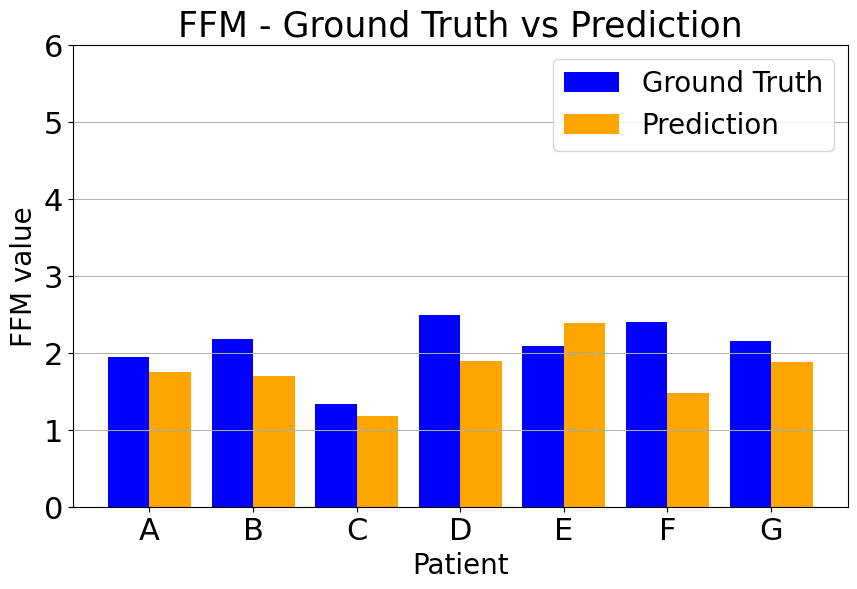

In [ ]:
## MODEL PREDICTION vs GROUND TRUTH bar chart
import matplotlib.pyplot as plt
import numpy as np

# FFM Prediction for Bicep Region
GT_FM = [1.9401999711990356, 2.177799940109253, 1.330899953842163, 2.4855000972747803, 2.0833001136779785, 2.3958001136779785, 2.1493000984191895]
Pred_FM = [1.7488856315612793, 1.699321985244751, 1.1762871742248535, 1.8969175815582275, 2.3902523517608643, 1.4723296165466309, 1.8761663436889648]

# Creating the bar chart
plt.figure(figsize=(10, 6))

# Define the position for the bars
x = np.arange(len(GT_FM))

# Plotting the Ground Truth as bars above the line
plt.bar(x - 0.2, GT_FM, width=0.4, label='Ground Truth', color='blue', align='center')

# Plotting the Predicted values as bars, but taking their absolute values for symmetry
plt.bar(x + 0.2, Pred_FM, width=0.4, label='Prediction', color='orange', align='center')

# Adjusting axis labels and title font size
plt.xlabel('Patient', fontsize=20)
plt.ylabel('FFM value', fontsize=20)
plt.title('FFM - Ground Truth vs Prediction', fontsize=25)

# Customizing x-axis tick labels to be A, B, C, etc.
plt.xticks(x, [chr(65 + i) for i in range(len(GT_FM))], fontsize=22)

plt.yticks(fontsize=22)

# Adding a legend with larger font size
plt.legend(fontsize=20)

# Enlarging the y-axis scale slightly to bring the bars closer together visually
plt.ylim(0, 6)
plt.savefig('ffm_gt_pred.png', dpi=500, bbox_inches='tight')

plt.grid(axis='y', linestyle='-', linewidth=0.7)
plt.show()


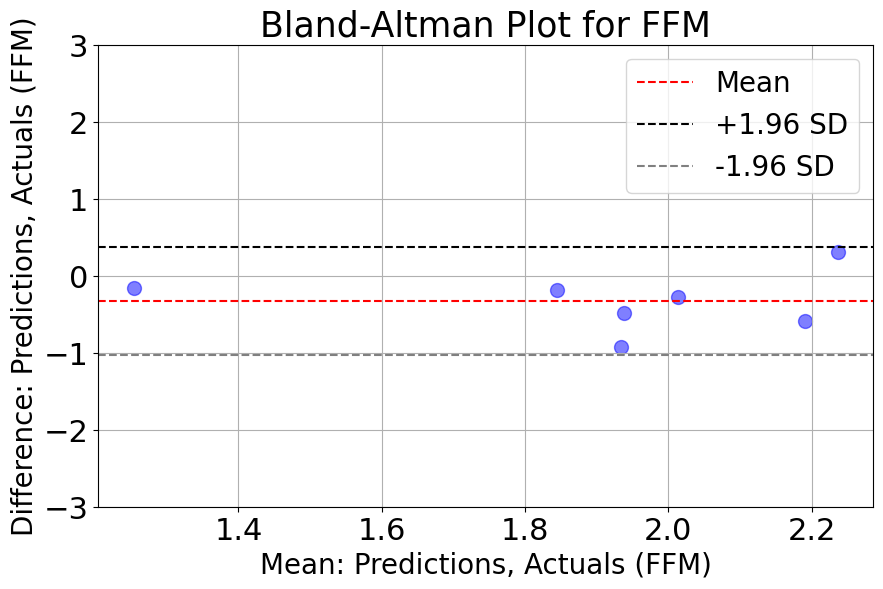

In [ ]:
## Bland - Altman Plot
import numpy as np
import matplotlib.pyplot as plt

def bland_altman_plot(actuals, predictions, y_min=None, y_max=None):
    differences = predictions - actuals  # Calculate the differences
    means = (predictions + actuals) / 2  # Calculate the means

    mean_difference = np.mean(differences)
    sd_difference = np.std(differences)

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(means, differences, s=100, alpha=0.5, color='blue')

    # Plot the mean difference line
    mean_line = plt.axhline(mean_difference, color='red', linestyle='--', label='Mean')

    # Plot the upper and lower limits of agreement
    upper_limit = plt.axhline(mean_difference + 1.96 * sd_difference, color='black', linestyle='--', label='+1.96 SD')
    lower_limit = plt.axhline(mean_difference - 1.96 * sd_difference, color='gray', linestyle='--', label='-1.96 SD')

    # Optionally, adjust text annotations or remove them if the legend suffices
    # plt.text(np.mean(means), (plt.ylim()[1] + plt.ylim()[0]) / 2, 'Mean', color='red', fontsize=12,
    #          verticalalignment='top', horizontalalignment='left')
    # plt.text(np.min(means), mean_difference + 1.96 * sd_difference, '+1.96 SD', color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
    # plt.text(np.min(means), mean_difference - 1.96 * sd_difference, '-1.96 SD', color='black', fontsize=12, verticalalignment='top', horizontalalignment='left')

    plt.title('Bland-Altman Plot for FFM', fontsize=25)
    plt.xlabel('Mean: Predictions, Actuals (FFM)', fontsize=20)
    plt.ylabel('Difference: Predictions, Actuals (FFM)', fontsize=20)

    # Set font size for x and y axis tick labels
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    # Adjust the y-axis scale if provided

    plt.ylim(-3, 3)

    plt.grid(True)

    # Add the legend
    plt.legend(fontsize=20, loc='upper right')  # You can adjust the location as needed

    plt.savefig('ffm_bap.png', dpi=500, bbox_inches='tight')
    plt.show()
actuals = np.array(GT_FM)
predictions = np.array(Pred_FM)
bland_altman_plot(actuals, predictions)


-0.3289485148021153
Mean Difference (Bias): -0.3289485148021153
Lower Limit of Agreement: -1.031761063114459
Upper Limit of Agreement: 0.37386403351022846


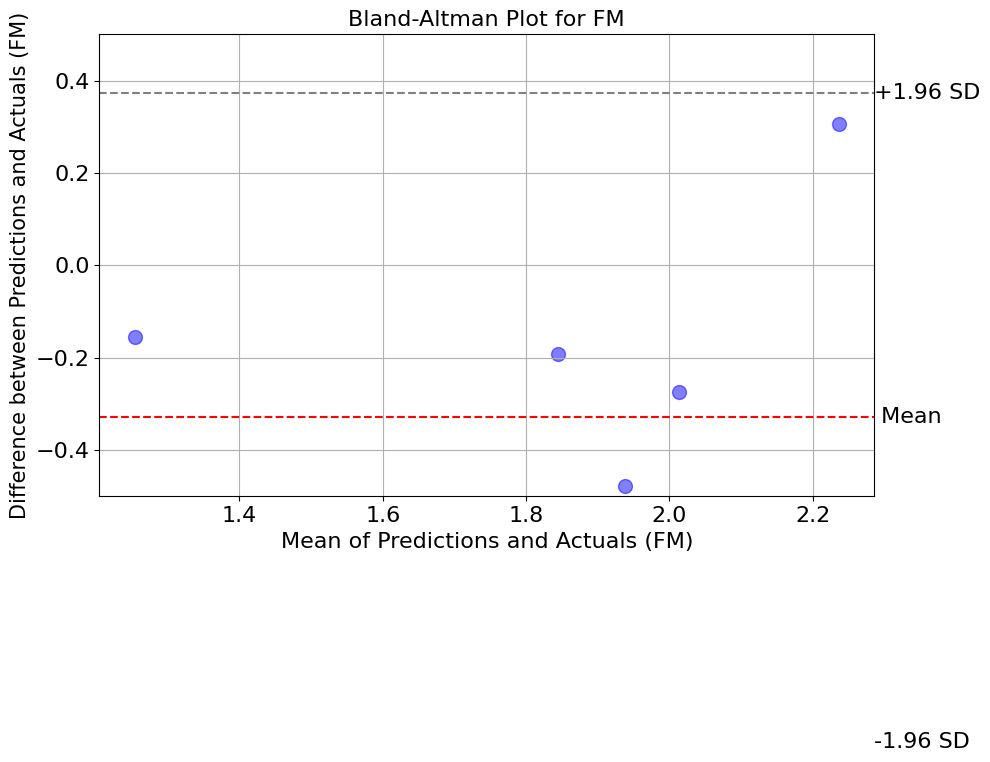

In [ ]:
## Upper and Lower Bias Means fr Bland - Altman Plot
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

GT_FM = [1.9401999711990356, 2.177799940109253, 1.330899953842163, 2.4855000972747803, 2.0833001136779785, 2.3958001136779785, 2.1493000984191895]
Pred_FM = [1.7488856315612793, 1.699321985244751, 1.1762871742248535, 1.8969175815582275, 2.3902523517608643, 1.4723296165466309, 1.8761663436889648]

def bland_altman_plot(actuals, predictions, y_min=None, y_max=None):
    differences = predictions - actuals  # Calculate the differences
    means = (predictions + actuals) / 2  # Calculate the means

    mean_difference = np.mean(differences)
    print(mean_difference)
    sd_difference = np.std(differences)

    # Calculate limits of agreement
    lower_limit = mean_difference - 1.96 * sd_difference
    upper_limit = mean_difference + 1.96 * sd_difference

    # Print results
    print(f"Mean Difference (Bias): {mean_difference}")
    print(f"Lower Limit of Agreement: {lower_limit}")
    print(f"Upper Limit of Agreement: {upper_limit}")

    plt.figure(figsize=(10, 6))
    plt.scatter(means, differences, s=100, alpha=0.5, color = 'blue')
    plt.axhline(mean_difference, color='red', linestyle='--')
    plt.axhline(mean_difference + 1.96 * sd_difference, color='gray', linestyle='--')
    plt.axhline(mean_difference - 1.96 * sd_difference, color='gray', linestyle='--', label='-1.96 SD')

    # Set the offset for the x-position of the labels
    x_offset = np.max(means) + (np.max(means) - np.min(means)) * 0.05  # 5% to the right of max mean

    # Move labels to the right side of the plot
    plt.text(x_offset, mean_difference, ' Mean', horizontalalignment='left', fontsize=16, verticalalignment='center')
    plt.text(x_offset, mean_difference + 1.96 * sd_difference, '+1.96 SD', horizontalalignment='left', fontsize=16, verticalalignment='center')
    plt.text(x_offset, mean_difference - 1.96 * sd_difference, '-1.96 SD', horizontalalignment='left', fontsize=16, verticalalignment='center')

    plt.title('Bland-Altman Plot for FM', fontsize=16)
    plt.xlabel('Mean of Predictions and Actuals (FM)', fontsize=16)
    plt.ylabel('Difference between Predictions and Actuals (FM)', fontsize=15)

    # Set font size for x and y axis tick labels
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    # Adjust the y-axis scale
    plt.ylim(-0.5,0.5)

    plt.grid(True)
    #plt.figure(dpi=400)
    plt.savefig('fm_bap.png', dpi=500, bbox_inches='tight')
    plt.show()


# Example usage
actuals = np.array(GT_FM)
predictions = np.array(Pred_FM)
bland_altman_plot(actuals, predictions, y_min=-10, y_max=10)

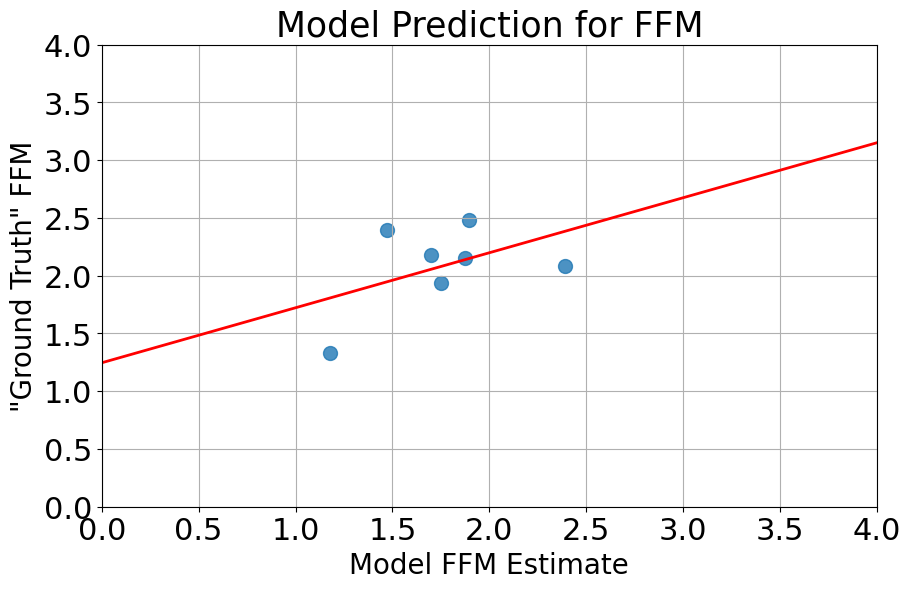

In [ ]:
# Model Prediction Plot
import matplotlib.pyplot as plt
import numpy as np

# Example data
ground_truth = GT_FM
prediction = Pred_FM

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(prediction, ground_truth, s=100, alpha=0.8)

# Calculate the line of best fit (linear regression)
slope, intercept = np.polyfit(prediction, ground_truth, 1)

# Define a range for x values (for the line of best fit)
x_fit = np.linspace(0, 4, 100)
y_fit = slope * x_fit + intercept

# Plot the line of best fit
plt.plot(x_fit, y_fit, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Model FFM Estimate', fontsize=20)
plt.ylabel('"Ground Truth" FFM', fontsize=20)
plt.title('Model Prediction for FFM', fontsize=25)
plt.grid(True)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Set axis limits
plt.ylim(0, 4)
plt.xlim(0, 4)
plt.savefig('ffm_mod_pred.png', dpi=500, bbox_inches='tight')

# Show plot
plt.show()

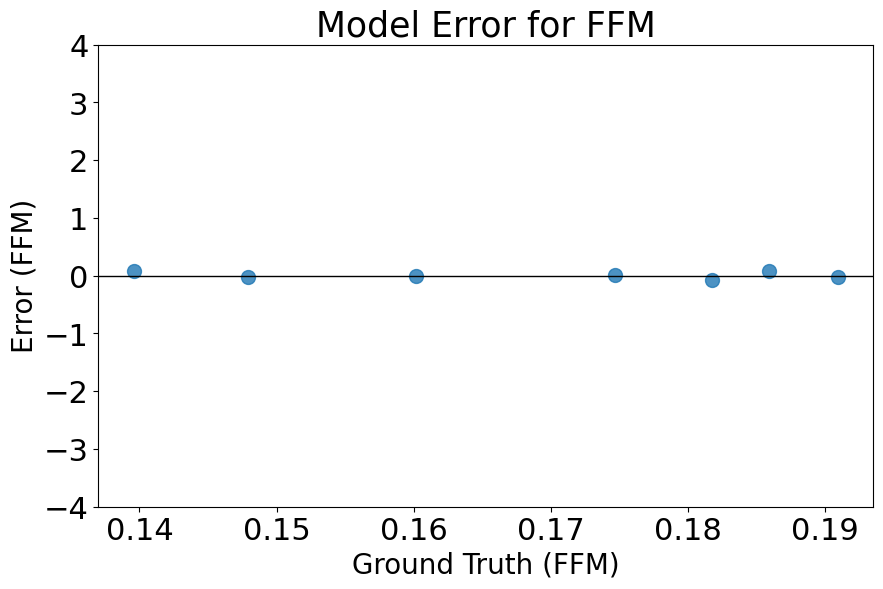

In [ ]:
# Model Error Plot
ground_truth = GT_FM
prediction = Pred_FM

# Calculate error
error = difference = [a - b for a, b in zip(prediction, ground_truth)]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ground_truth, error, s=100, alpha=0.8)
plt.axhline(y=0, color='black', linewidth=1)

# Add labels and title
plt.xlabel('Ground Truth (FFM)', fontsize=20)
plt.ylabel('Error (FFM)', fontsize=20)
plt.title('Model Error for FFM', fontsize=25)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.ylim(-4,4)
plt.savefig('ffm_mod_err.png', dpi=500, bbox_inches='tight')
# Show plot
plt.show()

### FM (B)

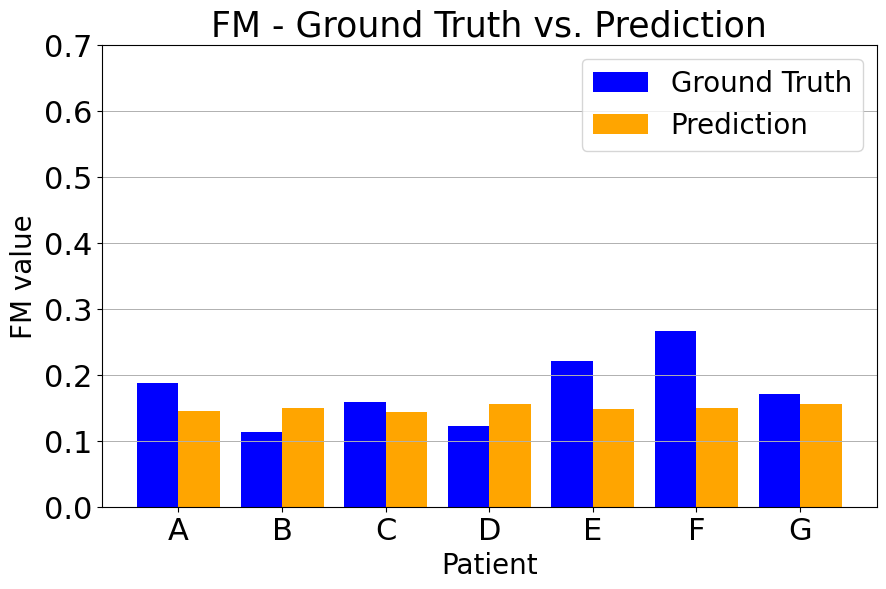

In [ ]:
## MODEL PREDICTION vs GROUND TRUTH bar chart
import matplotlib.pyplot as plt
import numpy as np

#GT_FM = [0.18799999356269836, 0.11249999701976776, 0.15880000591278076, 0.1216999962925911, 0.22089999914169312, 0.2667999863624573, 0.1712999939918518]
#Pred_FM = [0.14577913284301758, 0.14998528361320496, 0.14370286464691162, 0.1559763103723526, 0.14876854419708252, 0.15019001066684723, 0.15569420158863068]

# Creating the bar chart
plt.figure(figsize=(10, 6))
# Define the position for the bars
x = np.arange(len(GT_FM))

# Plotting the Ground Truth as bars above the line
plt.bar(x - 0.2, GT_FM, width=0.4, label='Ground Truth', color='blue', align='center')

# Plotting the Predicted values as bars, but taking their absolute values for symmetry
plt.bar(x + 0.2, Pred_FM, width=0.4, label='Prediction', color='orange', align='center')

# Adjusting axis labels and title font size
plt.xlabel('Patient', fontsize=20)
plt.ylabel('FM value', fontsize=20)
plt.title('FM - Ground Truth vs. Prediction', fontsize=25)

# Customizing x-axis tick labels to be A, B, C, etc.
plt.xticks(x, [chr(65 + i) for i in range(len(GT_FM))], fontsize=22)

plt.yticks(fontsize=22)

# Adding a legend with larger font size
plt.legend(fontsize=20)
# Enlarging the y-axis scale slightly to bring the bars closer together visually
plt.ylim(0, 0.7)
plt.grid(axis='y', linestyle='-', linewidth=0.7)
plt.savefig('fm_gt_pred.png', dpi=500, bbox_inches='tight')
plt.show()



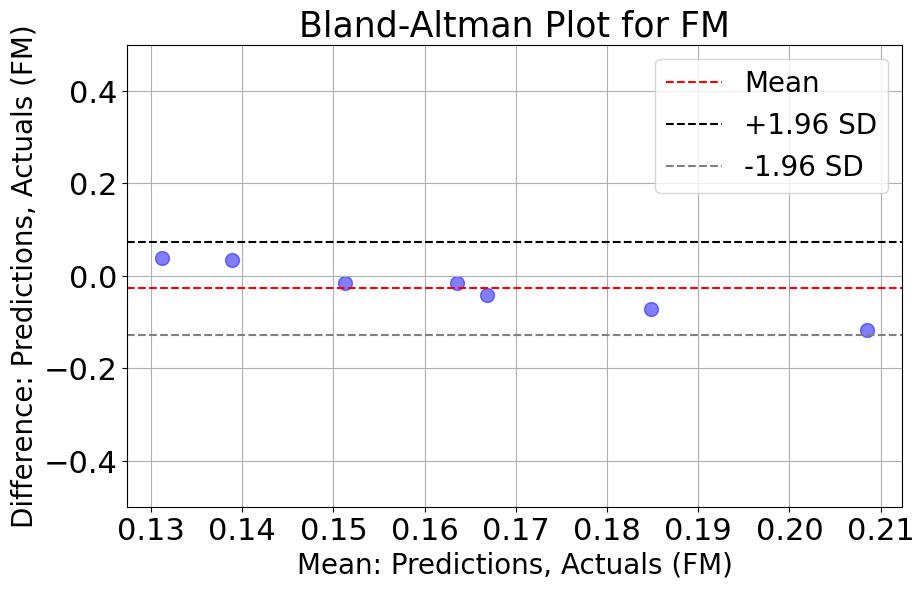

In [ ]:
# Bland Altman Plot
import numpy as np
import matplotlib.pyplot as plt

def bland_altman_plot(actuals, predictions, y_min=None, y_max=None):
    differences = predictions - actuals  # Calculate the differences
    means = (predictions + actuals) / 2  # Calculate the means

    mean_difference = np.mean(differences)
    sd_difference = np.std(differences)

    plt.figure(figsize=(10, 6))
    plt.scatter(means, differences, s=100, alpha=0.5, color='blue')
    plt.axhline(mean_difference, color='red', linestyle='--', label='Mean')
    plt.axhline(mean_difference + 1.96 * sd_difference, color='black', linestyle='--', label='+1.96 SD')
    plt.axhline(mean_difference - 1.96 * sd_difference, color='gray', linestyle='--', label='-1.96 SD')

    plt.title('Bland-Altman Plot for FM', fontsize=25)
    plt.xlabel('Mean: Predictions, Actuals (FM)', fontsize=20)
    plt.ylabel('Difference: Predictions, Actuals (FM)', fontsize=20)

    # Set font size for x and y axis tick labels
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    # Adjust the y-axis scale if provided
    plt.ylim(-0.5,0.5)
    plt.legend(fontsize=20, loc='upper right')  # You can adjust the location as needed

    plt.grid(True)
    plt.savefig('fm_bap.png', dpi=500, bbox_inches='tight')
    plt.show()
actuals = np.array(GT_FM)
predictions = np.array(Pred_FM)
bland_altman_plot(actuals, predictions, y_min=-10, y_max=10)  # Set y_min and y_max as needed


0.04864379493450299


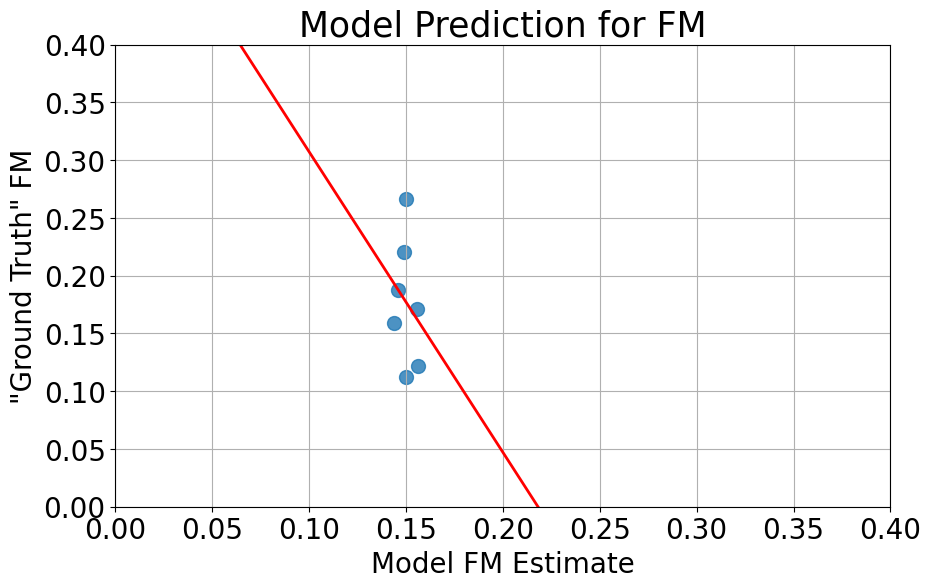

In [ ]:
# Model Prediction Plot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Example data
ground_truth = GT_FM
prediction = Pred_FM

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(prediction, ground_truth, s=100, alpha=0.8)

# Calculate the line of best fit (linear regression)
slope, intercept = np.polyfit(prediction, ground_truth, 1)

# Define a range for x values (for the line of best fit)
x_fit = np.linspace(0, 4, 100)
y_fit = slope * x_fit + intercept

# Plot the line of best fit
plt.plot(x_fit, y_fit, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Model FM Estimate', fontsize=20)
plt.ylabel('"Ground Truth" FM', fontsize=20)
plt.title('Model Prediction for FM', fontsize=25)
plt.grid(True)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Set axis limits
plt.ylim(0, 0.4)
plt.xlim(0, 0.4)

r2 = r2_score(ground_truth, np.polyval([slope, intercept], prediction))
print(r2)
plt.savefig('fm_mod_pred.png', dpi=500, bbox_inches='tight')
# Show plot
plt.show()

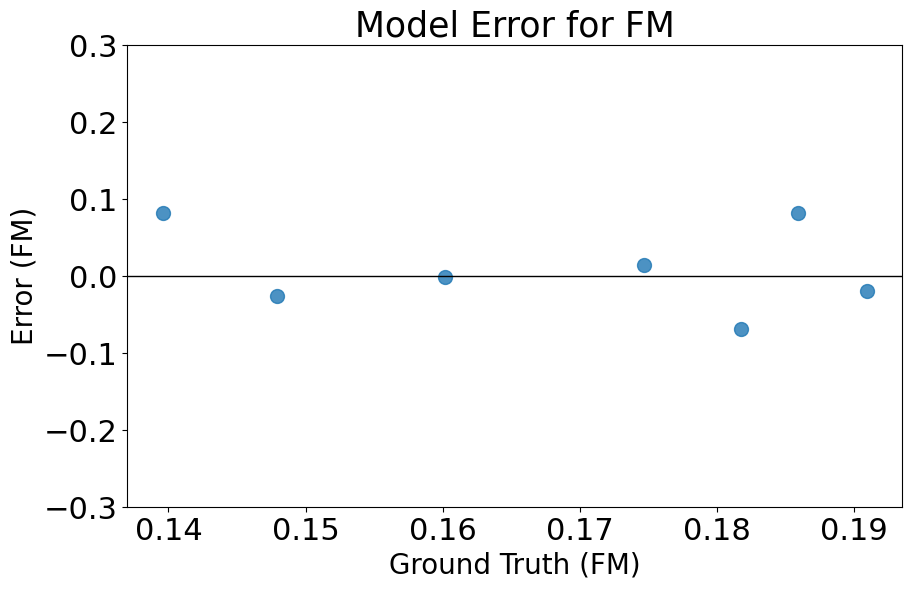

In [ ]:
# Model Error Plot
ground_truth = GT_FM
prediction = Pred_FM

# Calculate error
error = difference = [a - b for a, b in zip(prediction, ground_truth)]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ground_truth, error, s=100, alpha=0.8)
plt.axhline(y=0, color='black', linewidth=1)

# Add labels and title

plt.xlabel('Ground Truth (FM)', fontsize=20)
plt.ylabel('Error (FM)', fontsize=20)
plt.title('Model Error for FM', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylim(-0.3,0.3)
# Show plot
plt.savefig('fm_mod_err.png', dpi=500, bbox_inches='tight')
plt.show()

## Combining the Figure Created above to make final Figure 6 and Figure 7

Figure 6 below:

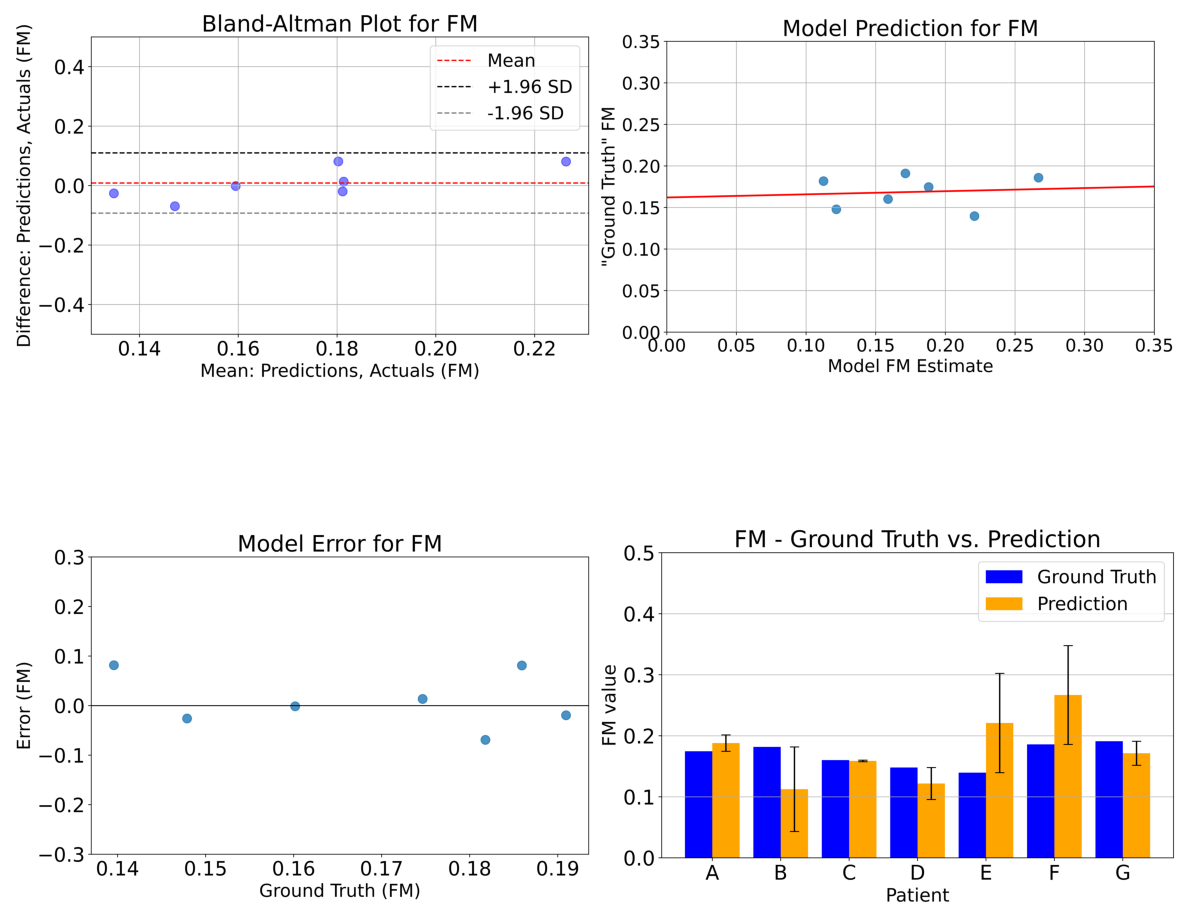

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Load and display the images
img1 = mpimg.imread('fm_gt_pred.png')
axs[1, 1].imshow(img1)
axs[1, 1].axis('off')

img2 = mpimg.imread('fm_bap.png')
axs[0, 0].imshow(img2)
axs[0, 0].axis('off')

img3 = mpimg.imread('fm_mod_pred.png')
axs[0, 1].imshow(img3)
axs[0, 1].axis('off')

img4 = mpimg.imread('fm_mod_err.png')
axs[1, 0].imshow(img4)
axs[1, 0].axis('off')

# Adjust layout and display the figure
plt.tight_layout()
fig.subplots_adjust(wspace=0.0) # Adjust wspace and hspace
plt.show()

Figure 7 below:

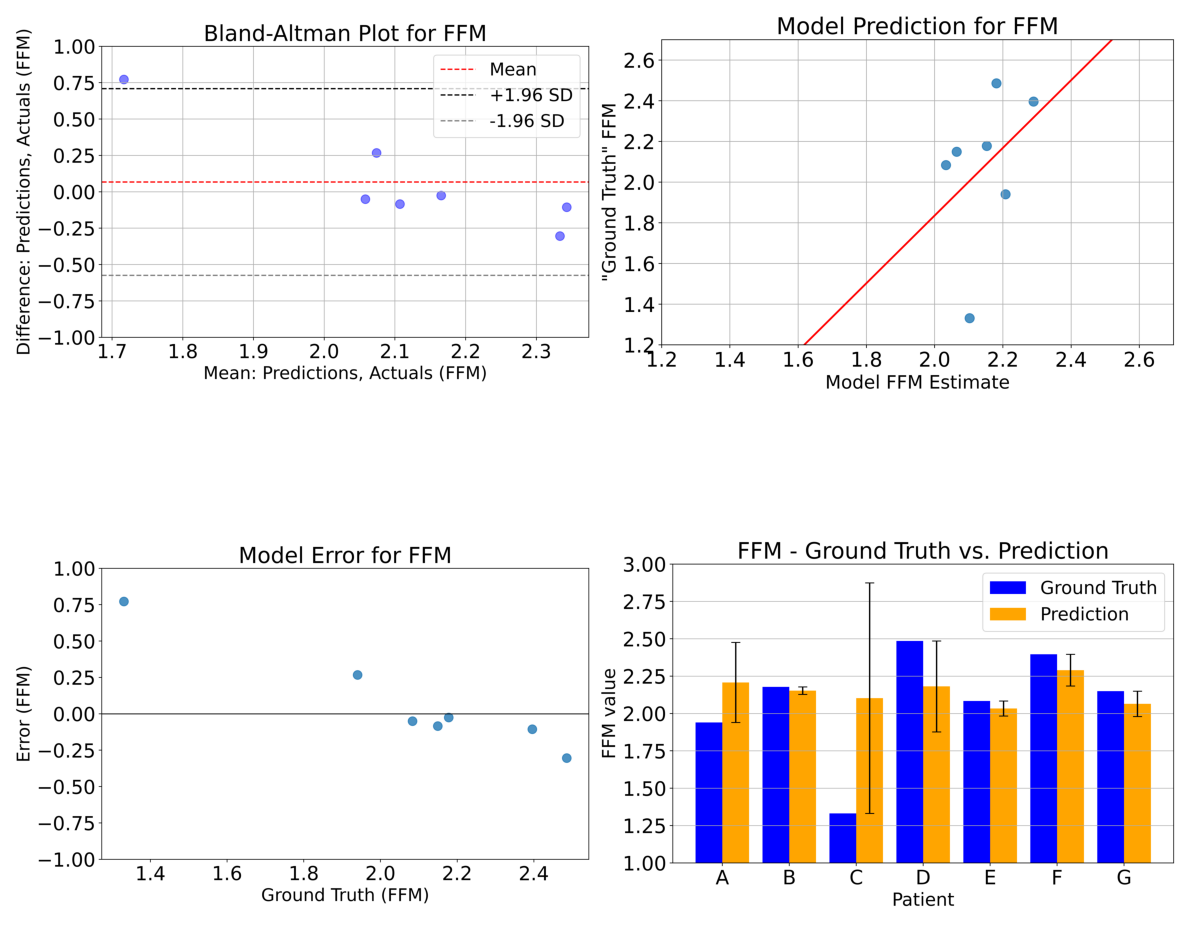

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Load and display the images
img1 = mpimg.imread('ffm_gt_pred.png')
axs[1, 1].imshow(img1)
axs[1, 1].axis('off')

img2 = mpimg.imread('ffm_bap.png')
axs[0, 0].imshow(img2)
axs[0, 0].axis('off')

img3 = mpimg.imread('ffm_mod_pred.png')
axs[0, 1].imshow(img3)
axs[0, 1].axis('off')

img4 = mpimg.imread('ffm_mod_err.png')
axs[1, 0].imshow(img4)
axs[1, 0].axis('off')

# Adjust layout and display the figure
plt.tight_layout()
fig.subplots_adjust(wspace=0.0) # Adjust wspace and hspace
plt.show()